# Statistic for AI and Data Science Coursework 1

## Part 1: Bar Chart of the Age Profile

The aim of this section is to show the proportions of a population in each age range. Complete the following steps:

#### Question 1.1

Calculate the total population of England. Use this to plot a bar chart showing the proportions of the total England population in each age range.

In [598]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [599]:
# Read the CSV file
df = pd.read_csv('LSOA_data.csv')

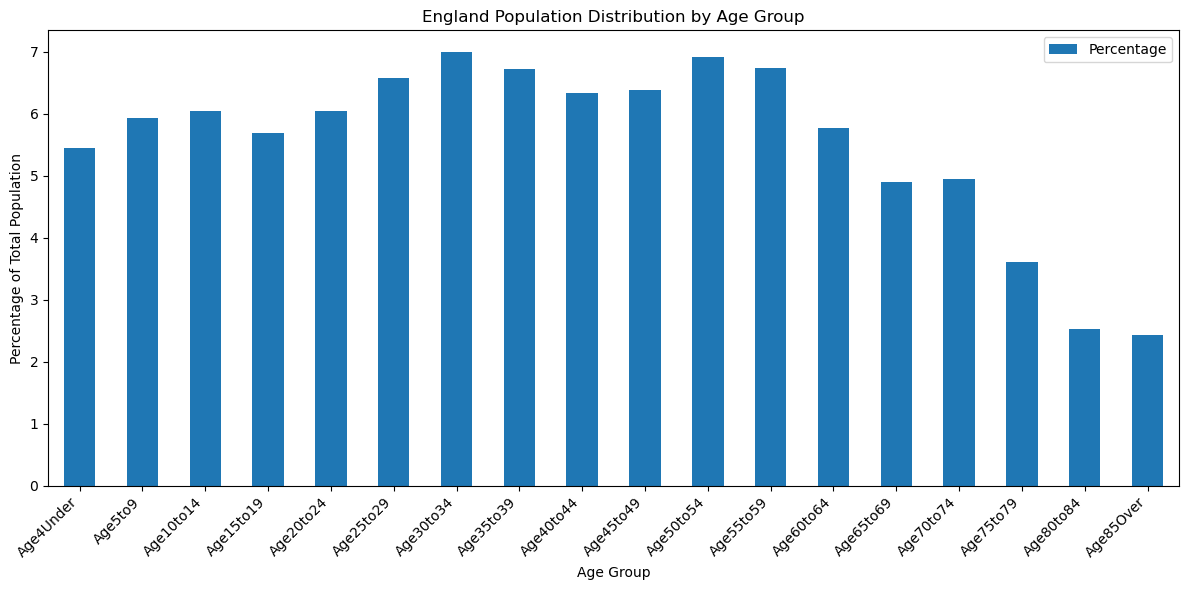

Total population of England: 56,490,091


In [600]:
# Calculate the total population for all LSOAs
england_total_population = df['Total'].sum()

# Calculate the total population for each age group
age_columns = [col for col in df.columns if col.startswith('Age')]
age_group_totals = df[age_columns].sum()

# Calculate percentages
england_percentages = (age_group_totals / england_total_population) * 100

# Create a DataFrame for plotting
england_population_by_age = pd.DataFrame({
    'Age Group': age_columns,
    'Percentage': england_percentages})

# Create the bar chart
england_population_by_age.plot(kind='bar', x='Age Group', y='Percentage', figsize=(12, 6),
                               title = 'England Population Distribution by Age Group',
                               ylabel = 'Percentage of Total Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Total population of England: {england_total_population:,}")

#### Question 1.2

Using a bar chart, compare the population of each age range for the following LSOAs: E01005044 (Bury 026E), E01020395 (Dorset 024A) and E01009136 (Birmingham 014E) and the total population of England. Use proportions so that the differences in total populations in the three LSOAs and England do not matter.

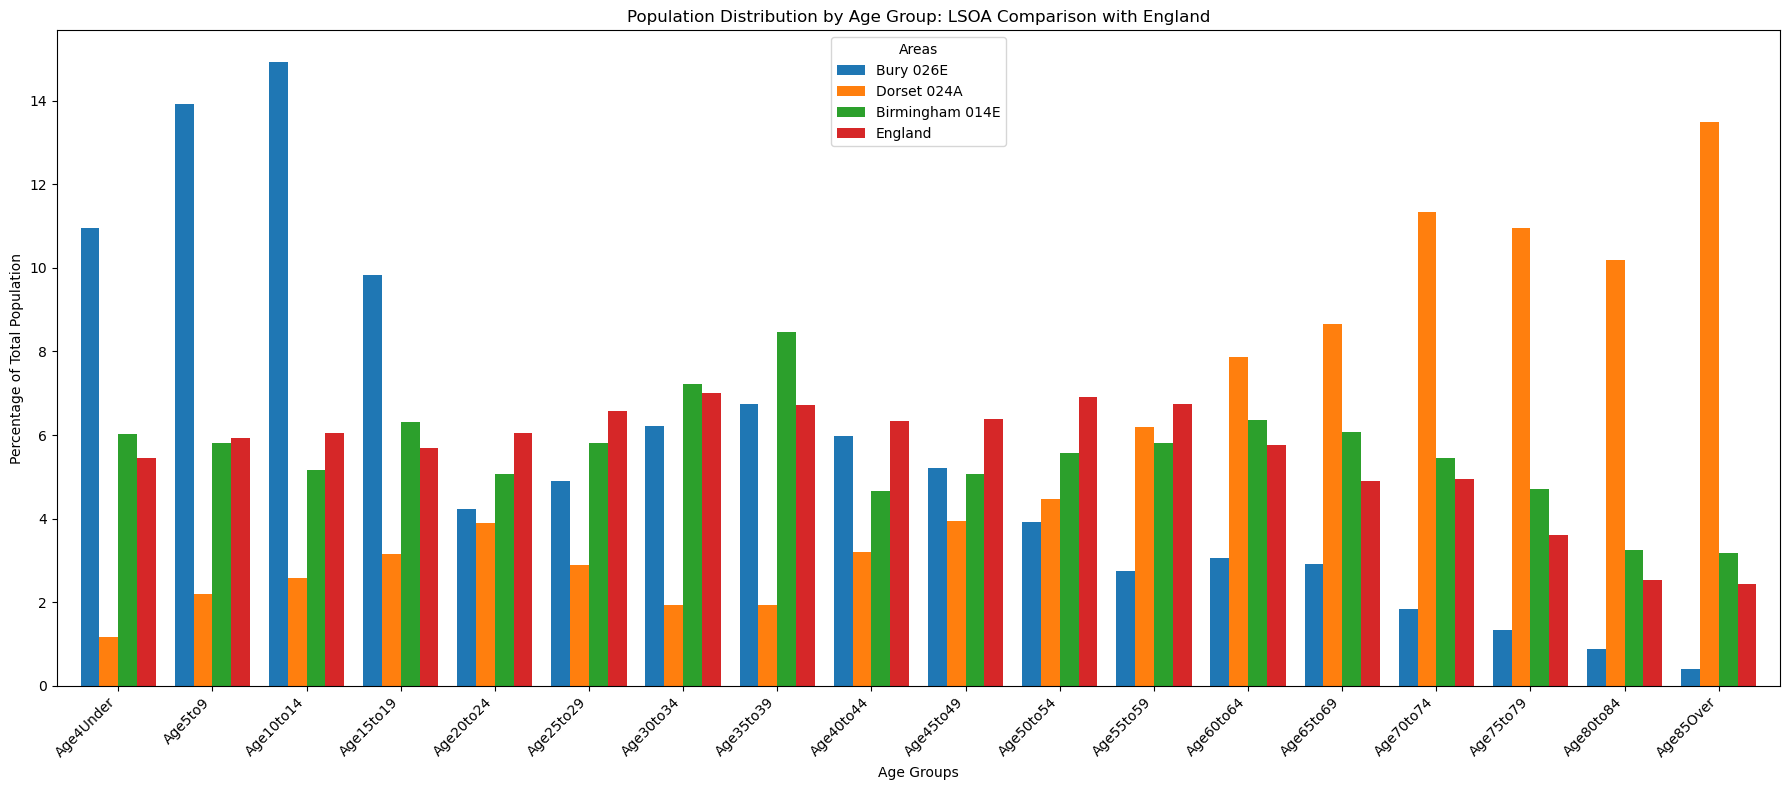

In [602]:
# Define LSOA codes and names
lsoa_codes = ['E01005044', 'E01020395', 'E01009136']
lsoa_names = ['Bury 026E', 'Dorset 024A', 'Birmingham 014E']

# Identify age group columns (assuming they all start with 'Age')
age_columns = [col for col in df.columns if col.startswith('Age') and col != 'Total']

# Process LSOA data
lsoa_data = {}

for code, name in zip(lsoa_codes, lsoa_names):
    lsoa_row = df[df['LSOACode'] == code].iloc[0]
    total_population = lsoa_row['Total']
    percentages = (lsoa_row[age_columns] / total_population) * 100
    lsoa_data[name] = percentages

# Process England data
lsoa_data['England'] = england_percentages

# Plotting
plot_data = pd.DataFrame(lsoa_data)

plot_data.plot(kind='bar', figsize=(18, 8), width=0.8,
               title = 'Population Distribution by Age Group: LSOA Comparison with England')
plt.xlabel('Age Groups')
plt.ylabel('Percentage of Total Population')
plt.legend(title='Areas')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Question 1.3

Suggest some reasons why the age distribution in some areas may differ from the national average. (You are not expected to be an expert on English demographics). The ONS has a set of definitions – no need to study the details but note the complexity.

Age distribution varies across different areas due to various factors:

* **Bury 026E**: Its proximity to Manchester, a major urban centre, positions it as a satellite town and transit-oriented community. It attracts a younger demographic (young professionals, young families and first-time buyers) due to job prospects, relatively affordable housing, cost-effective living, and educational opportunities.
* **Dorset 024A**: Its coastal regions and slower pace of life often appeal to elderly residents as retirement destinations. However, the limited availability of major job opportunities might deter younger adults seeking career growth.
* **Birmingham 014E**: As a large, diverse city with a wide range of industries, universities, and cultural attractions, Birmingham provides opportunities for people across all age groups. Its varied housing options and stable job market support a more balanced demographic profile, closely mirroring the national average.

## Part 2: Distribution of the Younger, Older and Median Ages in Each LSOA

The aim of this part is to work with histograms. Complete the following steps:

#### Question 2.1

Add new variables (i.e. columns) to the data frame. The new columns are:

  a. The proportion of younger residents on the LSOA. These are the counts in the first four age groups (Age4Under, Age5to9, Age10to14, Age15to19), divided by the total for the LSO area.

  b. The proportion of older residents in the LSOA. These are the counts in the last five age groups, starting with Age65to69.

  c. An estimate of the median age in the LSOA. (See notes in the appendix on calculating the median age]

In [607]:
# a. Add a new column of the proportion of younger residents in the LSOA to the data frame
df['proportion_younger'] = df[['Age4Under', 'Age5to9', 'Age10to14', 'Age15to19']].sum(axis=1) / df['Total']

# b. Add a new column of the proportion of older residents in the LSOA to the data frame
df['proportion_older'] = df[['Age65to69', 'Age70to74', 'Age75to79', 'Age80to84', 'Age85Over']].sum(axis=1) / df['Total']

# c. Add a new column of estimate of the median age in the LSOA to the data frame
# Define a function to estimate the median age
def median_age(counts, ages):
    total = sum(counts)
    cumul_sum = 0
    cumul_fract = []

    for count in counts:
        cumul_sum += count
        cumul_fract.append(cumul_sum / total)

    index = 0
    while index < len(cumul_fract) and cumul_fract[index] < 0.5:
        index += 1
    if index == len(cumul_fract):
        return ages[-1]

    prev_fract = 0
    if index > 0:
        prev_fract = cumul_fract[index - 1]
    remaining_fract = 0.5 - prev_fract
    fract_increase = cumul_fract[index] - prev_fract

    median_age = ages[index] + 5 * (remaining_fract / fract_increase)
    return median_age

# Prepare age group data
age_columns = [col for col in df.columns if col.startswith('Age') and col != 'Total']
ages = list(range(0, 5 * len(age_columns), 5))

# Use the apply function to apply the median_age function to each row
df['median_age'] = df[age_columns].apply(
    lambda row: median_age(row.values, ages), axis=1)
df

,LSOAName,LSOACode,PartOfCode,PartOfName,Total,Age4Under,Age5to9,Age10to14,Age15to19,Age20to24,...,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80to84,Age85Over,proportion_younger,proportion_older,median_age
0,City of London 001A,E01000001,E09000001,City of London,1473,52,34,32,23,90,...,73,83,119,102,57,57,35,0.095723,0.251188,44.276316
1,City of London 001B,E01000002,E09000001,City of London,1384,33,24,22,31,100,...,88,87,76,69,59,43,30,0.079480,0.200145,43.913043
2,City of London 001C,E01000003,E09000001,City of London,1613,39,32,33,23,96,...,118,111,86,85,50,31,33,0.078735,0.176689,43.896396
3,City of London 001E,E01000005,E09000001,City of London,1101,52,45,35,89,118,...,82,67,35,26,17,14,12,0.200727,0.094460,34.851695
4,Barking and Dagenham 016A,E01000006,E09000002,Barking and Dagenham,1842,153,127,110,122,124,...,85,70,66,41,18,17,16,0.277959,0.085776,34.454023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33750,Vale of White Horse 014H,E01035758,E07000180,Vale of White Horse,1169,39,45,58,38,63,...,57,49,57,70,46,70,77,0.153978,0.273738,44.888060
33751,Vale of White Horse 015G,E01035759,E07000180,Vale of White Horse,1519,116,107,82,66,62,...,106,102,56,75,58,29,32,0.244240,0.164582,40.027473
33752,Vale of White Horse 015H,E01035760,E07000180,Vale of White Horse,1610,206,152,97,49,59,...,30,24,14,15,13,20,33,0.313043,0.059006,31.716102
33753,Vale of White Horse 015I,E01035761,E07000180,Vale of White Horse,1609,184,121,98,58,62,...,50,37,50,40,23,32,29,0.286513,0.108142,32.968750


#### Question 2.2

Show the summary statistics (using ‘describe’) and the distributions of the total population, the younger and older proportions and the median age across the LSOAs. You should use histograms, substantially increasing the default number of bins and choosing the layout of the plots. Briefly comment on the shapes of these distributions (avoiding statistical language).

Summary Statistics:
              Total  proportion_younger  proportion_older    median_age
count  33755.000000        33755.000000      33755.000000  33755.000000
mean    1673.532543            0.227832          0.189168     42.032147
std      353.289631            0.055301          0.085520      7.782742
min      999.000000            0.018081          0.000736     14.530516
25%     1443.000000            0.192297          0.123995     36.128752
50%     1608.000000            0.223183          0.182751     41.460674
75%     1835.000000            0.258689          0.246851     47.821934
max     9900.000000            0.628793          0.655409     71.875000


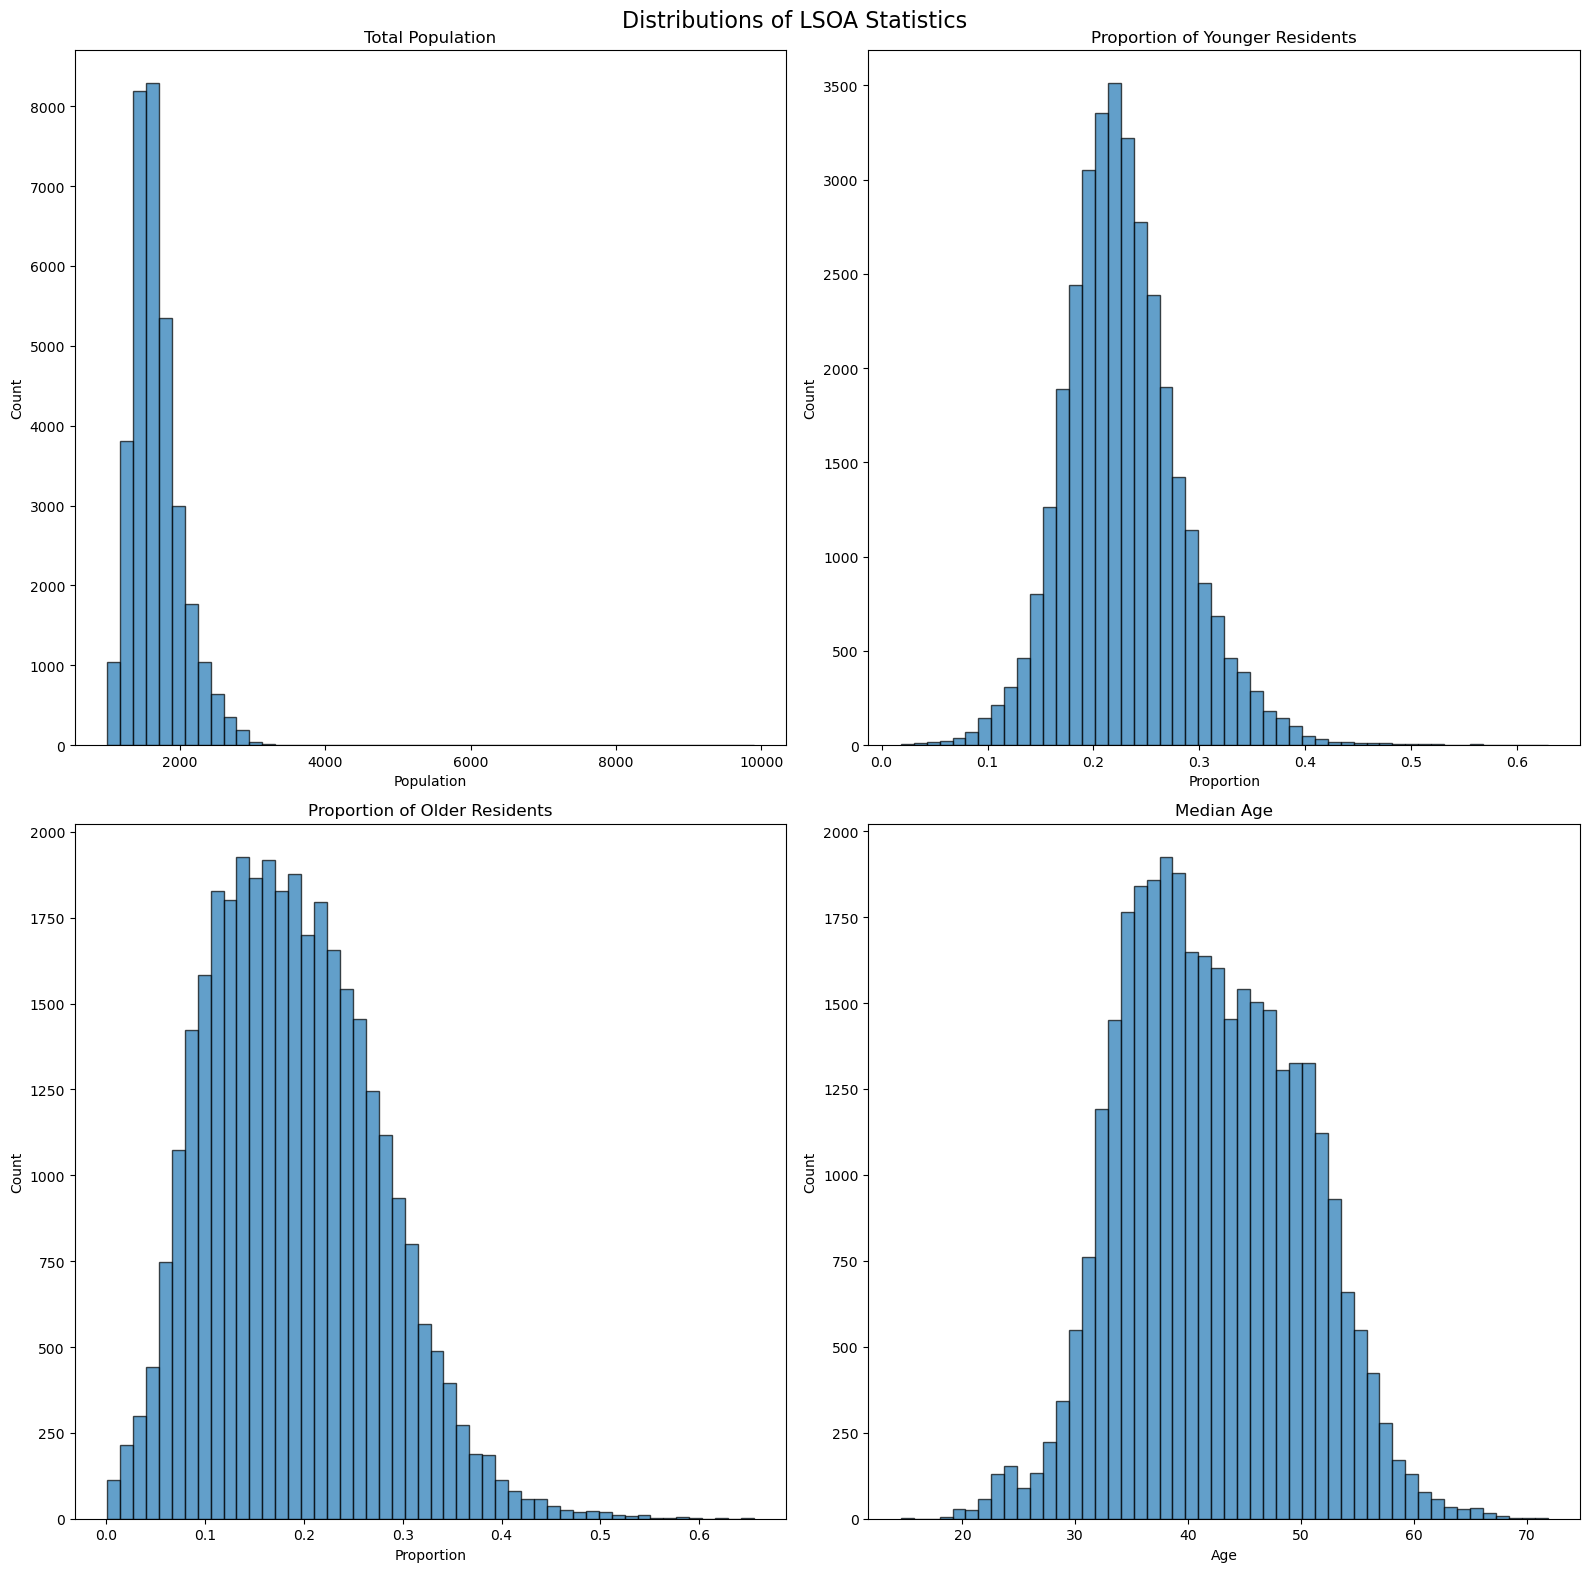

In [609]:
# Define columns and their properties
columns = {
    'Total': {'title': 'Total Population', 'xlabel': 'Population'},
    'proportion_younger': {'title': 'Proportion of Younger Residents', 'xlabel': 'Proportion'},
    'proportion_older': {'title': 'Proportion of Older Residents', 'xlabel': 'Proportion'},
    'median_age': {'title': 'Median Age', 'xlabel': 'Age'}
}

# Calculate summary statistics
summary_stats = df[list(columns.keys())].describe()
print("Summary Statistics:")
print(summary_stats)

# Set up the plot style
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
fig.suptitle('Distributions of LSOA Statistics', fontsize=16)

# Create histograms
for (i, j), (col, props) in zip([(0, 0), (0, 1), (1, 0), (1, 1)], columns.items()):
    axs[i, j].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axs[i, j].set_title(props['title'])
    axs[i, j].set_xlabel(props['xlabel'])
    axs[i, j].set_ylabel('Count')

plt.tight_layout()
plt.show()

Based on the visual patterns in the graphs, we can identify several key characteristics of LSOA statistics:
* **Total Population**: This chart shows most areas have populations between 1,000 to 2,000 people. There are fewer areas with very small or very large populations, creating an asymmetrical shape that skewed to the left.
* **Proportion of Younger Residents**: This forms a fairly symmetrical bell shape, with most areas having around 20-25% young residents. 
* **Proportion of Older Residents**: The proportion of older residents varies more widely, with a general average of 15-20%. This chart has a longer tail to the right, indicating some areas have notably higher proportions of older residents.
* **Median Age**:  The median age in many LSOAs is around 40 years old, but there are also noticeable clusters of areas with younger or older populations. This suggests a diverse range of age profiles across different LSOAs, with most falling between 30 and 50 years old.

#### Question 2.3

Calculate the median age for the whole of England and compare it with the 50th percentile value of the distribution of median ages by LSOA. Explain why the two values differ a little.

In [612]:
england_ages = list(range(0, 5 * len(age_columns), 5))
england_median_age = median_age(age_group_totals.values, england_ages)

lsoa_median_age = df['median_age'].median()

print(f"Median age for the whole of England: {england_median_age:.2f}")
print(f"50th percentile of LSOA median ages: {lsoa_median_age:.2f}")
print(f"Difference: {abs(england_median_age - lsoa_median_age):.2f}")

Median age for the whole of England: 40.43
50th percentile of LSOA median ages: 41.46
Difference: 1.03


The discrepancy between the two values can be attributed to the different methodologies used. The England-wide median age is calculated based on the total population of each age group across the entire country. In contrast, the LSOA median age is determined by first calculating the median age for each LSOA individually, and then taking the median of these LSOA-specific medians. This LSOA method treats each LSOA equally, regardless of its population size, which can result in areas with extreme age distributions having a disproportionate influence on the overall median. 

## Part 3: Comparing the Median Age Distributions by Area Type

The aim of this section is to compare distributions, grouping the LSO areas by type. The area types are given by the PartOfCode variable, as follows.

Complete the following steps:

#### Question 3.1

Add the type of area to each LSO area. Group the data by the area type.

In [616]:
# Define a function to map geography code to area type
def get_area_type(PartOfCode):
    code_prefix = PartOfCode[:3]
    if code_prefix == 'E06':
        return 'Unitary Authorities'
    elif code_prefix == 'E07':
        return 'Non-metropolitan Districts'
    elif code_prefix == 'E08':
        return 'Metropolitan Districts'
    elif code_prefix == 'E09':
        return 'London Borough'
    else:
        return 'Other'

# Add the area type to each LSOA
df['AreaType'] = df['PartOfCode'].apply(get_area_type)

# Group the data by area type
grouped_data = df.groupby('AreaType')

df

,LSOAName,LSOACode,PartOfCode,PartOfName,Total,Age4Under,Age5to9,Age10to14,Age15to19,Age20to24,...,Age60to64,Age65to69,Age70to74,Age75to79,Age80to84,Age85Over,proportion_younger,proportion_older,median_age,AreaType
0,City of London 001A,E01000001,E09000001,City of London,1473,52,34,32,23,90,...,83,119,102,57,57,35,0.095723,0.251188,44.276316,London Borough
1,City of London 001B,E01000002,E09000001,City of London,1384,33,24,22,31,100,...,87,76,69,59,43,30,0.079480,0.200145,43.913043,London Borough
2,City of London 001C,E01000003,E09000001,City of London,1613,39,32,33,23,96,...,111,86,85,50,31,33,0.078735,0.176689,43.896396,London Borough
3,City of London 001E,E01000005,E09000001,City of London,1101,52,45,35,89,118,...,67,35,26,17,14,12,0.200727,0.094460,34.851695,London Borough
4,Barking and Dagenham 016A,E01000006,E09000002,Barking and Dagenham,1842,153,127,110,122,124,...,70,66,41,18,17,16,0.277959,0.085776,34.454023,London Borough
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33750,Vale of White Horse 014H,E01035758,E07000180,Vale of White Horse,1169,39,45,58,38,63,...,49,57,70,46,70,77,0.153978,0.273738,44.888060,Non-metropolitan Districts
33751,Vale of White Horse 015G,E01035759,E07000180,Vale of White Horse,1519,116,107,82,66,62,...,102,56,75,58,29,32,0.244240,0.164582,40.027473,Non-metropolitan Districts
33752,Vale of White Horse 015H,E01035760,E07000180,Vale of White Horse,1610,206,152,97,49,59,...,24,14,15,13,20,33,0.313043,0.059006,31.716102,Non-metropolitan Districts
33753,Vale of White Horse 015I,E01035761,E07000180,Vale of White Horse,1609,184,121,98,58,62,...,37,50,40,23,32,29,0.286513,0.108142,32.968750,Non-metropolitan Districts


#### Question 3.2

Plot the distributions of the median age for the 4 different areas, choosing how to do this to make it as easy as possible to compare them.

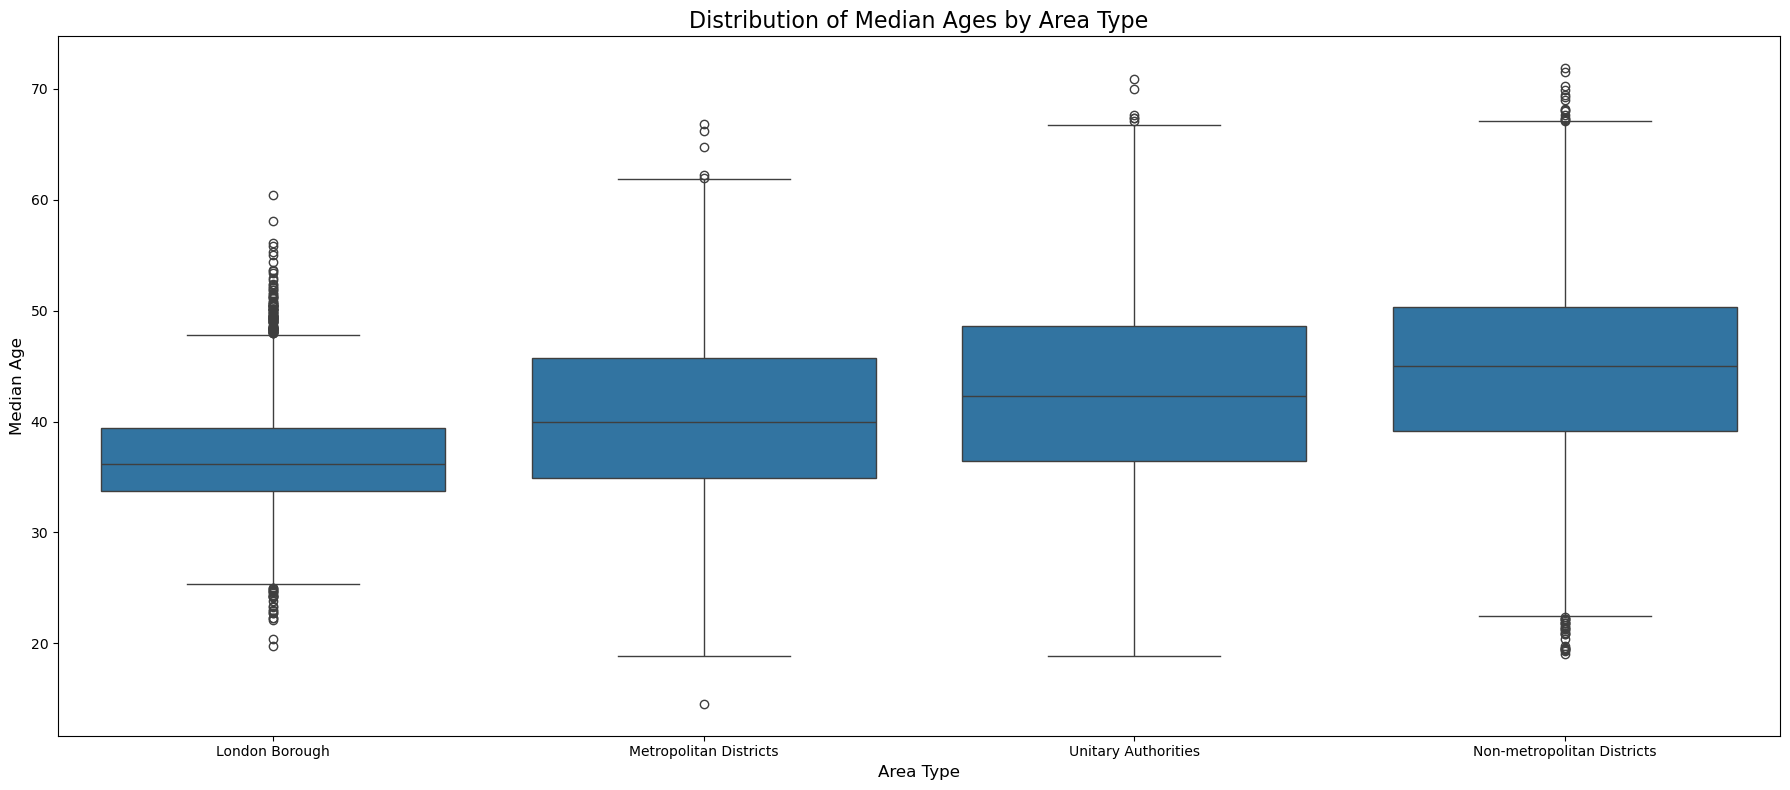

In [618]:
# Prepare age group data
age_columns = [col for col in df.columns if col.startswith('Age') and col != 'Total']
ages = list(range(0, 5 * len(age_columns), 5))

# Calculate median age for 4 different areas
df['median_age'] = df.apply(lambda row: median_age(row[age_columns].values, ages), axis=1)

# Plotting
plt.figure(figsize=(18, 8))
sns.boxplot(x='AreaType', y='median_age', data=df)
plt.title('Distribution of Median Ages by Area Type', fontsize=16)
plt.xlabel('Area Type', fontsize=12)
plt.ylabel('Median Age', fontsize=12)

plt.tight_layout()
plt.show()

#### Question 3.3

Comment briefly on the differences between the distribution for the four area types.

Comparing median ages across area types reveals distinct patterns. **Non-metropolitan Districts** have the highest median age and widest range, with outliers on both ends. **London Boroughs**, in contrast, have the lowest median age and smallest range, with several high-age outliers but an overall distribution skewed towards younger ages. **Unitary Authorities** show the second-highest median age, with less variability than Non-metropolitan Districts but more than the other types. **Metropolitan Districts** have a lower median age and smaller range compared to Non-metropolitan Districts and Unitary Authorities, with a few high-age outliers.

These findings suggest that rural areas (Non-metropolitan Districts) tend to have older populations with more variation in age, while urban areas, particularly London, have younger populations with more consistent age distributions. This pattern likely reflects differences in economic, social and cultural factors across these area types.

## Part 4: Classification of Unusual Areas by Proportions

The aim of this section is to look at the relationship between the younger and older proportions across the LSO areas. Complete the following steps:

#### Question 4.1

Draw a scatter plot of the younger proportion versus the older proportion, with each LSO area as one data point. [Hint: since there are lots of data points, it helps to make the markers smaller (s = 5) and partly transparent (alpha = 0.3).]

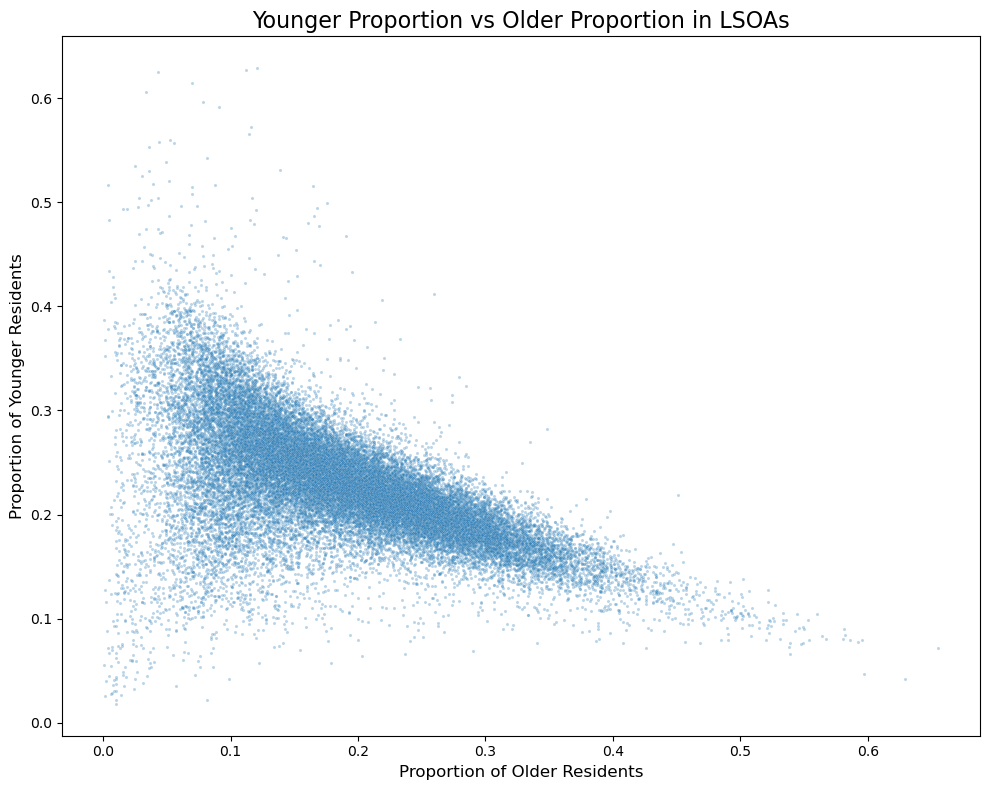

In [623]:
# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='proportion_older', y='proportion_younger',
                s=5, alpha=0.3)

# Customize the plot
plt.title('Younger Proportion vs Older Proportion in LSOAs', fontsize=16)
plt.xlabel('Proportion of Older Residents', fontsize=12)
plt.ylabel('Proportion of Younger Residents', fontsize=12)

plt.tight_layout()
plt.show()

#### Question 4.2

Briefly comments on the overall shape of this scatter plot, considering both the area containing most points and the extremes.


Based on the scatter plot of younger proportion versus older proportion in LSOAs, we can observe several key features. The plot shows a clear inverse relationship between younger and older resident proportions, demonstrating a **negative correlation**. As one proportion increases, the other tends to decrease.

The majority of points are concentrated in a dense area from approximately (0.1, 0.3) to (0.3, 0.15). This **main cluster** suggests that most LSOAs have a moderate mix of younger and older residents, with slightly more variation in the older proportion.

At the **extremes**, some LSOAs have very high proportions of younger residents (up to about 0.5) with very low proportions of older residents. Conversely, there are also LSOAs with high proportions of older residents (up to about 0.5) and low proportions of younger residents. What is noteworthy is that very few LSOAs have extremely low proportions of both younger and older residents, as evidenced by the sparse bottom-left corner of the plot.

#### Question 4.3

The shape is roughly triangular, with three ‘extreme’ corners. Give the three extreme areas suitable names (for example, the areas with low proportions of both young and old might be called ‘workers’). By looking at the plot, define rules using ranges of the two proportions to classify each LSOA as ‘normal’ (most areas) or belonging to one of the extremes (a few areas). The rules are not expected to be exact: any approximation is ok. Add a variable with the class of each area to the data frame.

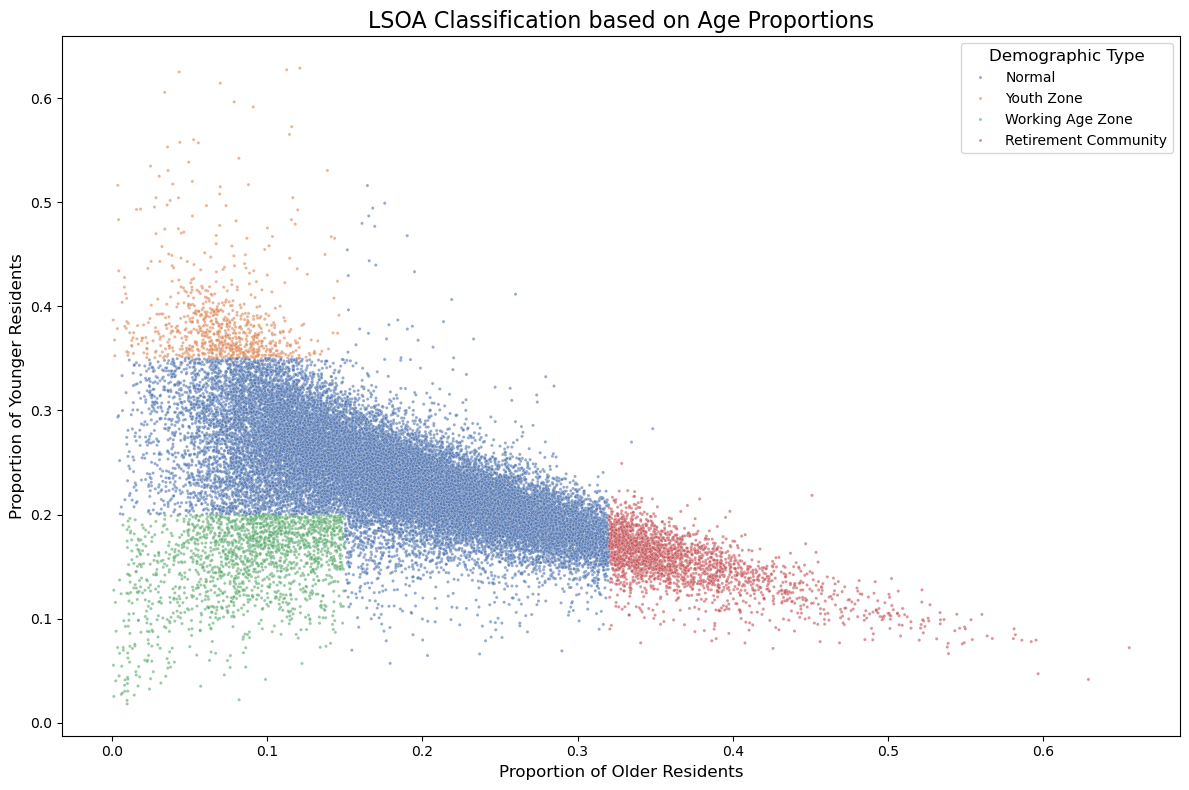

,LSOAName,LSOACode,PartOfCode,PartOfName,Total,Age4Under,Age5to9,Age10to14,Age15to19,Age20to24,...,Age65to69,Age70to74,Age75to79,Age80to84,Age85Over,proportion_younger,proportion_older,median_age,AreaType,demographic_type
0,City of London 001A,E01000001,E09000001,City of London,1473,52,34,32,23,90,...,119,102,57,57,35,0.095723,0.251188,44.276316,London Borough,Normal
1,City of London 001B,E01000002,E09000001,City of London,1384,33,24,22,31,100,...,76,69,59,43,30,0.079480,0.200145,43.913043,London Borough,Normal
2,City of London 001C,E01000003,E09000001,City of London,1613,39,32,33,23,96,...,86,85,50,31,33,0.078735,0.176689,43.896396,London Borough,Normal
3,City of London 001E,E01000005,E09000001,City of London,1101,52,45,35,89,118,...,35,26,17,14,12,0.200727,0.094460,34.851695,London Borough,Normal
4,Barking and Dagenham 016A,E01000006,E09000002,Barking and Dagenham,1842,153,127,110,122,124,...,66,41,18,17,16,0.277959,0.085776,34.454023,London Borough,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33750,Vale of White Horse 014H,E01035758,E07000180,Vale of White Horse,1169,39,45,58,38,63,...,57,70,46,70,77,0.153978,0.273738,44.888060,Non-metropolitan Districts,Normal
33751,Vale of White Horse 015G,E01035759,E07000180,Vale of White Horse,1519,116,107,82,66,62,...,56,75,58,29,32,0.244240,0.164582,40.027473,Non-metropolitan Districts,Normal
33752,Vale of White Horse 015H,E01035760,E07000180,Vale of White Horse,1610,206,152,97,49,59,...,14,15,13,20,33,0.313043,0.059006,31.716102,Non-metropolitan Districts,Normal
33753,Vale of White Horse 015I,E01035761,E07000180,Vale of White Horse,1609,184,121,98,58,62,...,50,40,23,32,29,0.286513,0.108142,32.968750,Non-metropolitan Districts,Normal


In [627]:
# Define and apply classification function
def classify_area(row):
    if row['proportion_younger'] > 0.35 and row['proportion_older'] < 0.15:
        return 'Youth Zone'
    elif row['proportion_older'] > 0.32 and row['proportion_younger'] < 0.25:
        return 'Retirement Community'
    elif row['proportion_younger'] < 0.20 and row['proportion_older'] < 0.15:
        return 'Working Age Zone'
    else:
        return 'Normal'

df['demographic_type'] = df.apply(classify_area, axis=1)

# Create a scatter plot where each point's color represents its classification
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='proportion_older', y='proportion_younger',
                hue='demographic_type', palette='deep', s=5, alpha=0.6)

plt.title('LSOA Classification based on Age Proportions', fontsize=16)
plt.xlabel('Proportion of Older Residents', fontsize=12)
plt.ylabel('Proportion of Younger Residents', fontsize=12)
plt.legend(title='Demographic Type', title_fontsize='12', fontsize='10')

plt.tight_layout()
plt.show()

df

#### Question 4.4

Use a pivot table to calculate the number of areas of each class in each type of area. Excluding the ‘normal’ areas, plot a bar chart of the counts. Comment on the results.

Pivot Table of Extreme Area Types:
              Area Type  Count
0  Retirement Community   2318
1      Working Age Zone   1843
2            Youth Zone    805




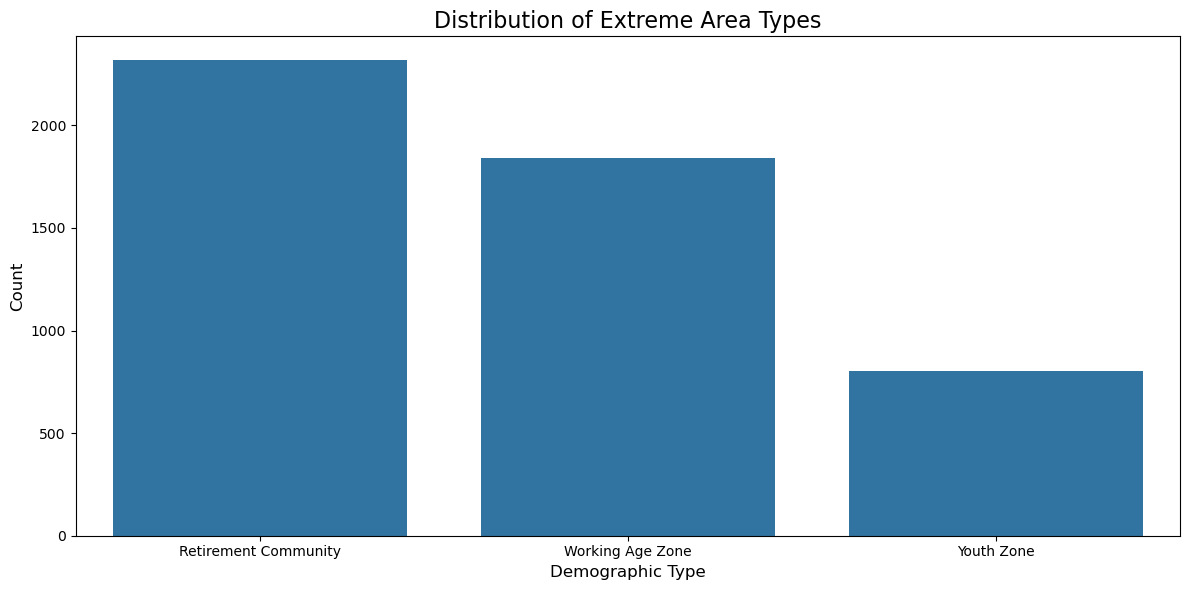

In [629]:
# Filter out 'Normal' areas
df_extreme = df[df['demographic_type'] != 'Normal']

# Create pivot table for extreme areas
pivot_table = df_extreme['demographic_type'].value_counts().reset_index()
pivot_table.columns = ['Area Type', 'Count']

# Print the pivot table
print("Pivot Table of Extreme Area Types:")
print(pivot_table)
print("\n")

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Area Type', y='Count', data=pivot_table)
plt.title('Distribution of Extreme Area Types', fontsize=16)
plt.xlabel('Demographic Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

England's demographic distribution shows distinct age-related patterns:

* **Concentration of elderly population**: Retirement communities are the most numerous, reflecting an aging population trend, likely concentrated in rural areas.
* **Widespread working-age population**: Working Age Zones are the second most common, indicating a broad distribution of employment centers. Such areas may be cities or commercial centers with a large number of employment opportunities.
* **Relative concentration of youth**: Youth Zones are the least numerous, but there are still 805 areas, which may represent university towns or urban areas where young people gather. 
* **Demographic imbalance**: The number of Retirement Communities is about three times that of Youth Zones, highlighting the challenges of an aging population.
* **Regional development disparities**: The distribution of different area types reflects the diversity of England's demographic structure, likely leading to variations in public service needs, economic activities, and social policy requirements across regions.

## Part 5: Mapping (optional)

This section introduces GeoPandas which is a library for drawing maps.

In [632]:
!pip install geopandas

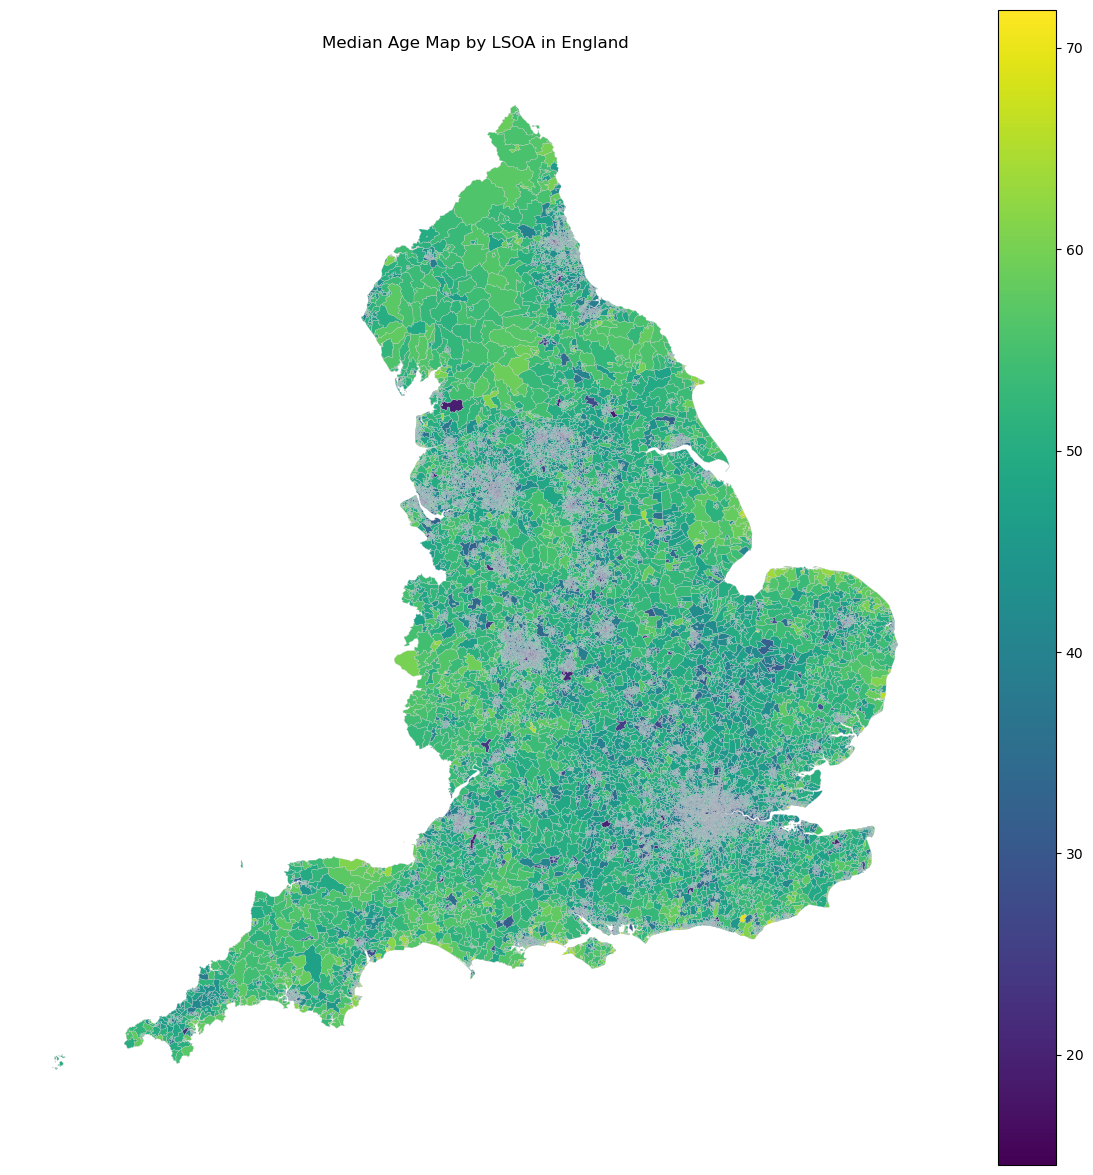

In [665]:
import geopandas as gpd

bdf = gpd.read_file('LSOA_England_geom.gpkg')

df_idx = df.set_index('LSOACode')
bdf2 = bdf.join(df_idx, how='right', on='LSOA21CD')

fig, ax = plt.subplots(figsize=(15, 15))
bdf2.plot(column='median_age', cmap='viridis', linewidth=0.2, edgecolor='0.8', ax=ax, legend=True)
plt.title('Median Age Map by LSOA in England')
ax.axis('off')
plt.show()